In [1]:
#Load Data
from tensorflow import keras

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [2]:
#Encoder
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])

In [3]:
#Decoder
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [4]:
#Gabungkan Encoder-Decoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [5]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

In [6]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                                  validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 19s 7ms/step - loss: 0.1470 - val_loss: 0.1092
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1050 - val_loss: 0.0995
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0991 - val_loss: 0.0963
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0964 - val_loss: 0.0939
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0946 - val_loss: 0.0927
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0933 - val_loss: 0.0914
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0923 - val_loss: 0.0909
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0914 - val_loss: 0.0905
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0907 - val_loss: 0.0893
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

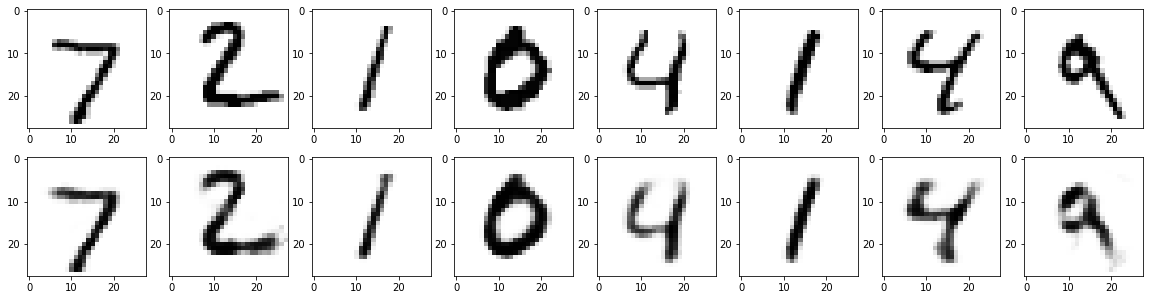

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  plt.imshow(x_test[i], cmap="binary")

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28, 28)), cmap="binary")

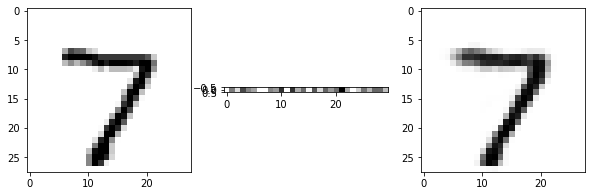

In [8]:
i = 0 # change this number

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(x_test[i], cmap="binary")

plt.subplot(1, 3, 2)
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
plt.imshow(latent_vector, cmap="binary")

plt.subplot(1, 3, 3)
pred = decoder.predict(latent_vector)
plt.imshow(pred[i], cmap="binary")